<a href="https://colab.research.google.com/github/codepradosh/Machine-Learning-Revision/blob/main/Notes_Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

Logistic Regression-1

1. Logistic Regression

2. Step Function

3. Sigmoid Function
4. geometric intution
5. Sigmoid is a monotonic increasing  function

6. Code Implementation of sigmoid function

7. log-loss
8. Optimization
9. Scratch code for implementation 



### Recap



<img src='https://drive.google.com/uc?id=1frpTelmC7J_wRl6OhViPXyobIfC-2TQz'>

QUICK RECAP

- Linear Regression uses a linear model to find best hyperplane which fits the data pattern.

- For regression problem, how Y is real number. Hence, we train linear regression model with equation: 
 -  $ŷ_i= w^Tx_i + w_0$

- Such that the squared loss $(y_i-ŷ_i)^2$ is minimum using framework of optimization 
    - Gradient Descent
    - Stochastic Gradient Descent






## Logistic Regression



<img src='https://drive.google.com/uc?id=1qgxP6Aok57O2BDkiHLckLYM6ai2nBC4X'>



- Since we are quite handy with Regression problems and how Linear Regression are used for predicting the values.
- We have another type of problem which is Classification problem which in simplier words means, classifying our data into categories  

- This way of classifying the data is done by Logistic Regression

#### How is Logistic different from Linear Regression ?
- The basic idea behind logisitic regression is to:
    - Builts a hyperplane that separates the data rather than follow the trend of the data as done by linear Regression.

#### How is our data notation in classification different from regression ?
- Data has n samples such that for each sample $(x_i,y_i)$
    - $x_i$ belongs to Real numbers
    - $y_i$ is either {0,1} or {-1,1} 
    - Example being fish sorting 
        - X being features of fishes such as height, weight, fin size, body size
        - Y being belongs to small fish (0) or large fish (1)  

**Observe**

how in classification $y_i$ has only two values.

-  This type of classifying data is called Binary Classification  
    

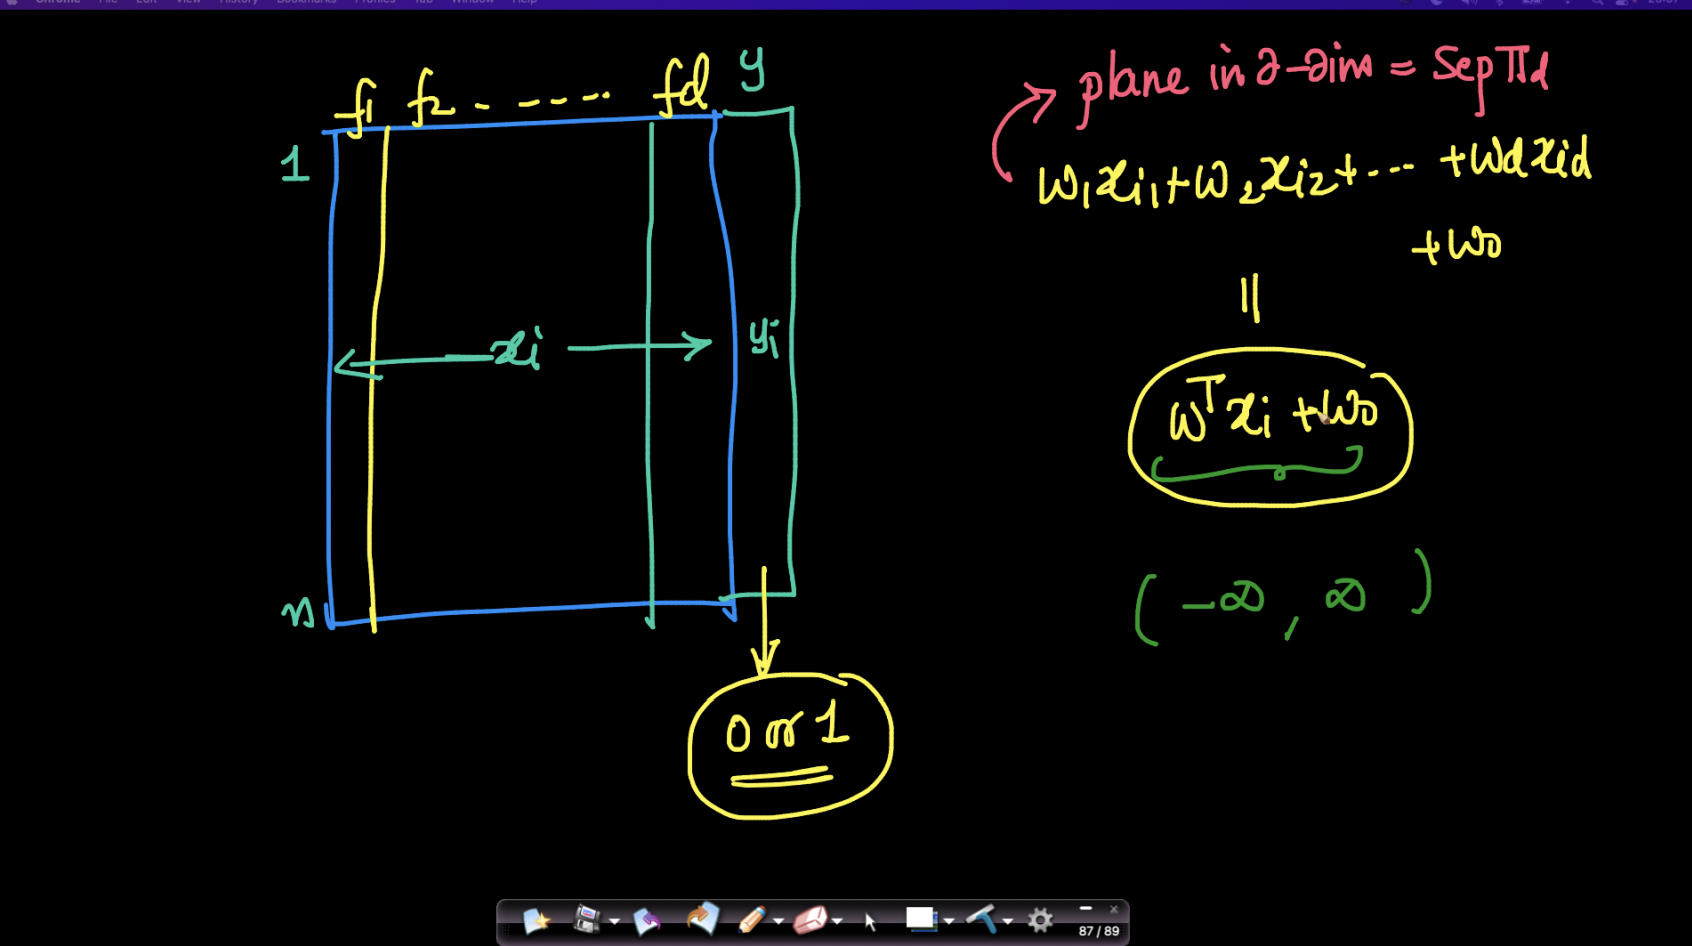

#### How data looks like ?

Ans: for ith sample in n samples, $x_i$ have d features and $y_i$ is either 0 or 1

#### What do we want to achieve ?
- We want a hyperplane in d-dim that separates the data into 0 and 1 
    - $w_1x_{i1}+w_2x_{i2}+w_3x_{i3}+.....+w_dx_{id}+ w_0 $ 
    
    - Simplifed to:  $w^Tx_i+w_0$. 

#### Can you see a problem between $w^Tx_i+w_0$ and $y_i$ ? 
- The range of the values of this function is ($-∞,∞$)
- But our output $y_i$ has only 2 values i.e 0 and 1

Hence we need of a function that maps values of $w^Tx_i+w_0$ to {0,1}


### **Step Function**

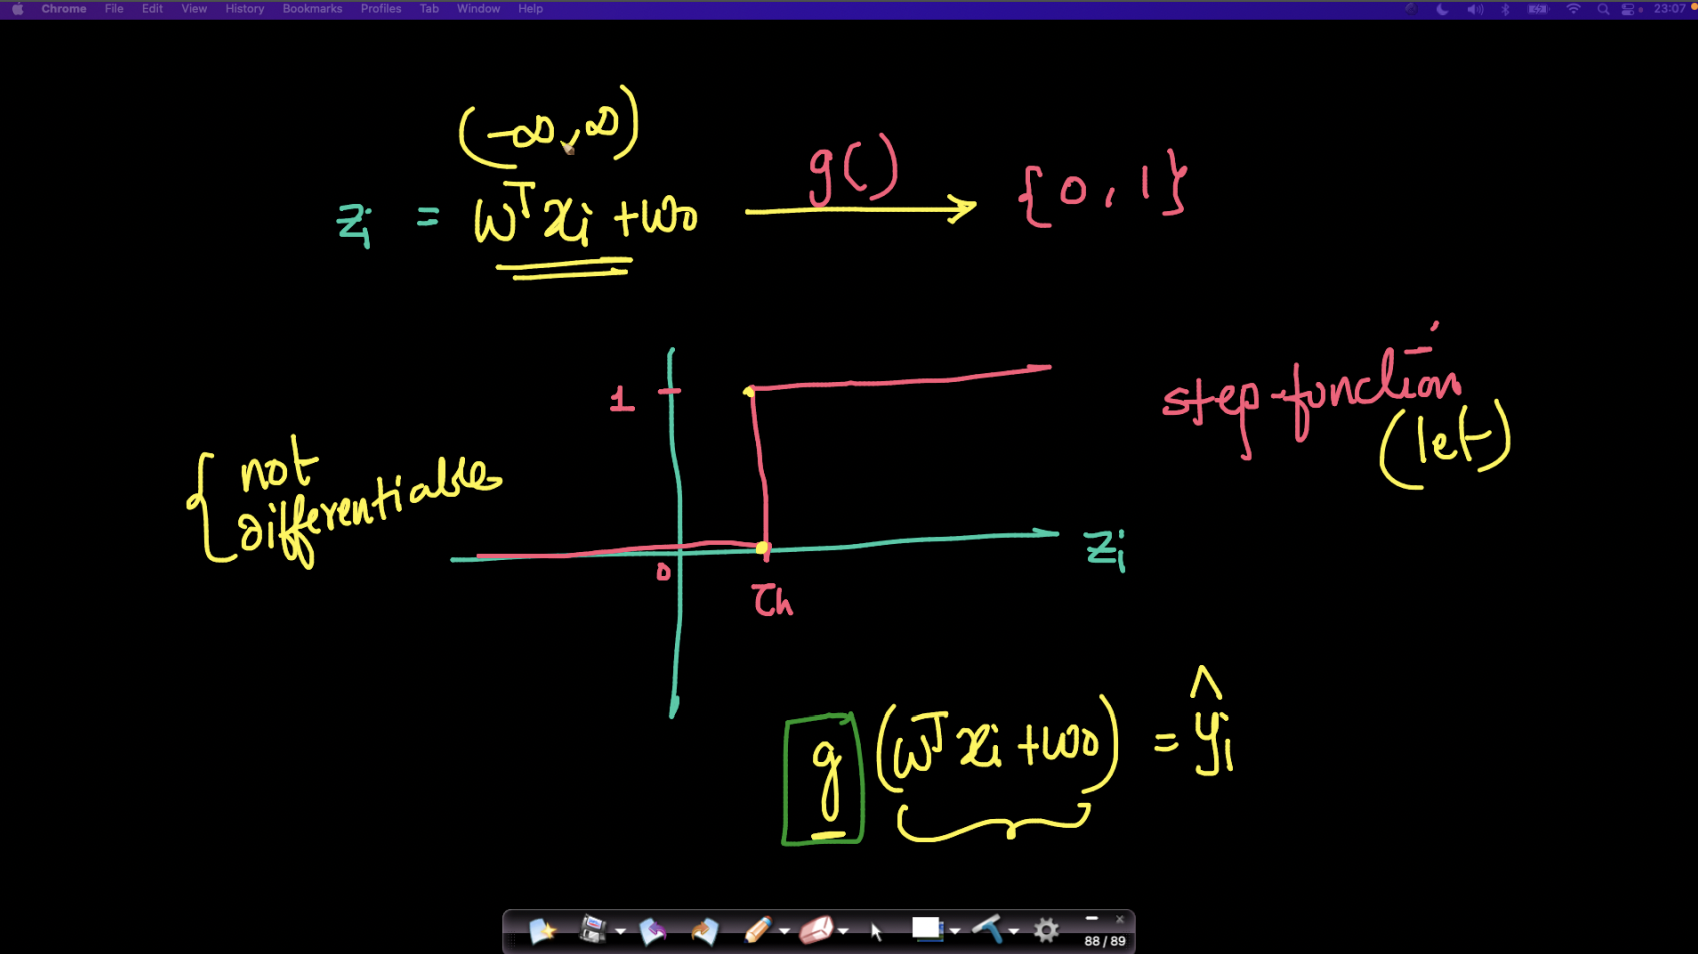

Lets define a function g() which has a threshold (th) such that
- value of $z_i = w^Tx_i+w_0$ < (th) = 0

- value of $z_i = w^Tx_i+w_0$ ≥ (th) = 1

- we get our $y_î = g(w^Tx_i+w_0) $ 

- this function g() is called a step function

Note: we define our $y_î$ after only applying our step function.

#### Do we see a problem while using step function ?
ANS: Step function is a non continous.  
 - Hence we cannot perform derivates of loss with respect to jth weight of the model $\frac{∂L(y,y_î)}{∂w_j} $ 


Therefore we need a smooth function 
- which is differentiable to perform optimization
 

## **Sigmoid Function**



<img src='https://drive.google.com/uc?id=1Fxx25-hs5ylag5BlY_iuQKqU9omS-39Z'>




- Since our $z_i=w^Tx_i+w_0$

- Now, we define a smooth and differentiable function  such that 
    - $g(z_i)$ tends to $0$ as $z_i$ tends  to $-∞$ 
    - $g(z_i)$ tends to $1$ as $z_i$ tends to $∞$ 
 
#### **Can you notice there is a small problem when using such a smooth function ?**
- the predicted value, $y_î = g(w^Tx_i+w_0) $ will have value between 0 and 1 (0,1) while $y_i$ has only two values 0 or 1 {0,1}

Note: 0 and 1 are not included in g(), since 0 or 1 is only possible when $z_i = -∞$ or $z_i = ∞$  


  

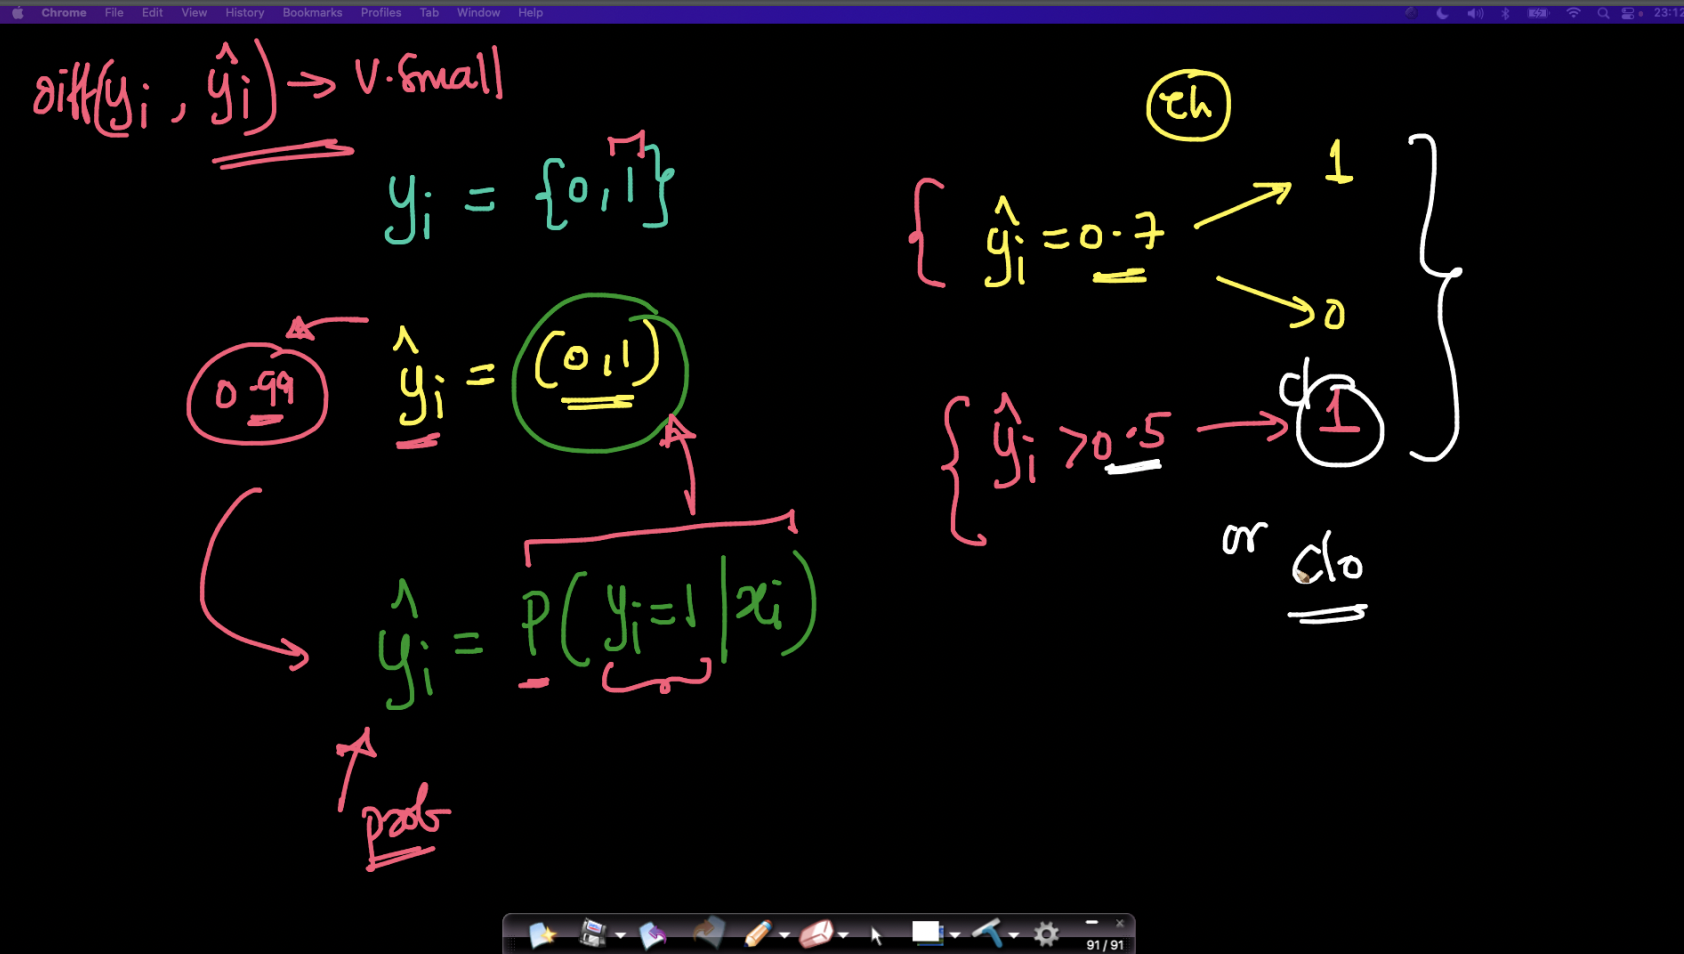

the solution for the smooth function to have values 0 and 1 is to have a threshold (th) and if
- $y_î$ ≥ th, $y_î$ = 1
- $y_î$ < th, $y_î$ = 0 

for Example
- can take th = 0.5  
    - $y_î$ ≥ 0.5, $y_î$ = 1
    - $y_î$ < 0.5, $y_î$ = 0 

Hence we can think of $y_î$ with value between 0 and 1 (0,1) as
- probability of  $y_i = 1$ given the d features $x_i$ 
- $y_î = P(y_i = 1|x_i)$

####**Question: Is 0.5 the only threshold we can have ?**

Ans: No, it depends on the problem . 

lets take an example 


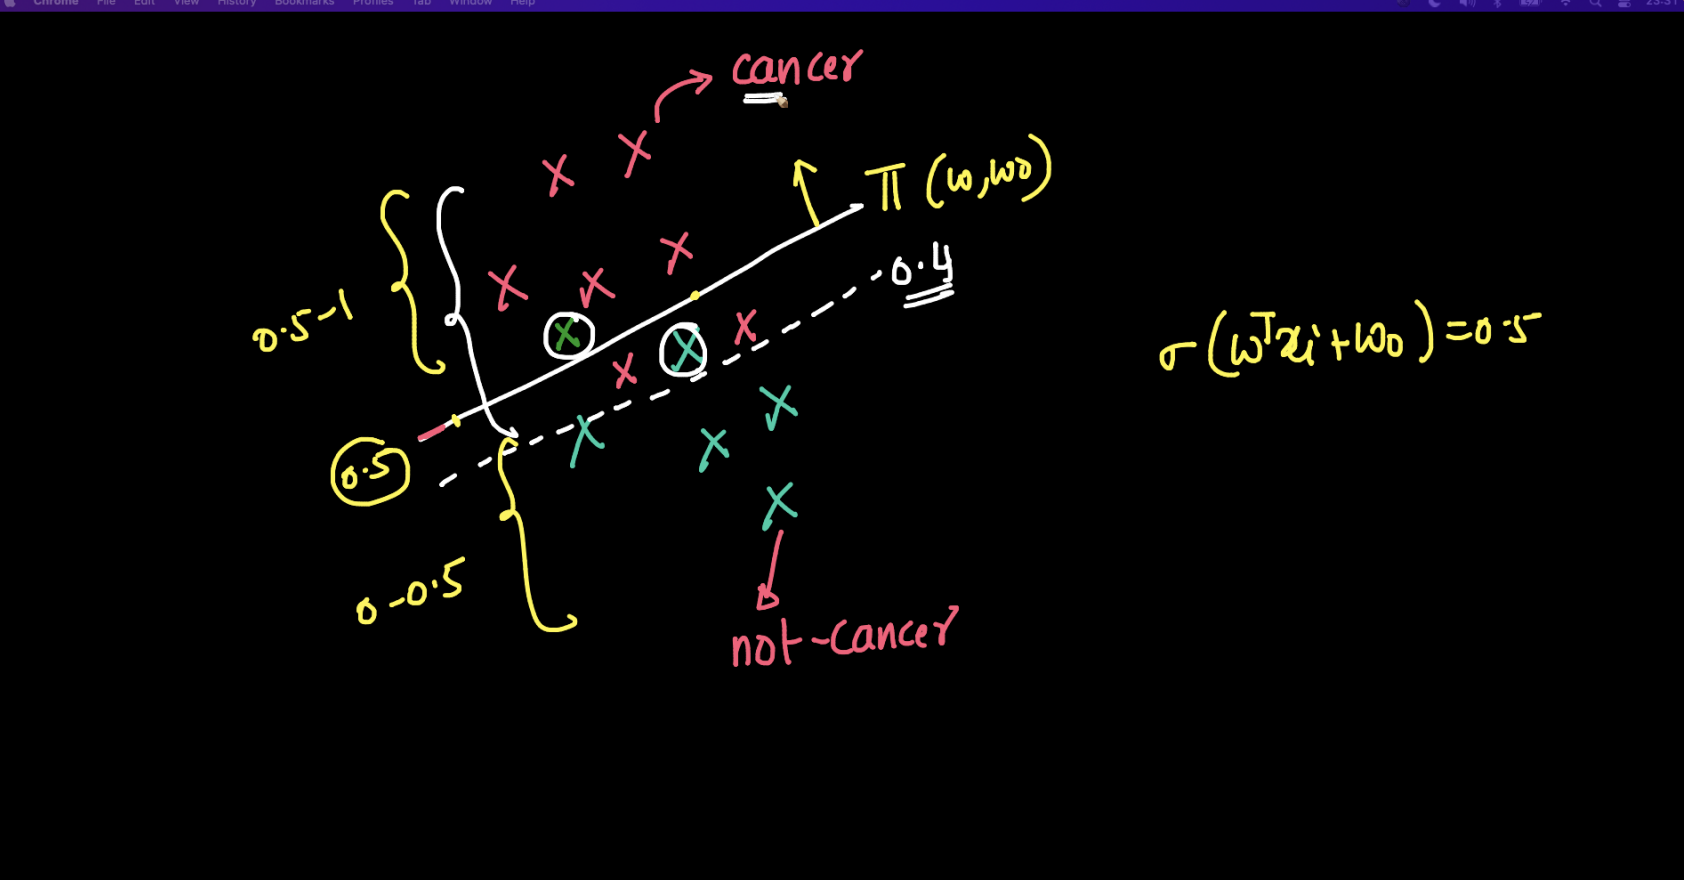

if we want to classify Cancer and non-cancer
#### What will be happen if we keep a threshold of 0.5 ?

classifies 2 cancer cases as non cancerous which should not be since here we are talking about life and death situation for a patient

#### What about a threshold of 0.4 ?

classifies 2 non cancer cases as cancerous while covering all the cancer cases which is still fine, 
- since the later tests would prove that those patients do not have cancer  






<img src='https://drive.google.com/uc?id=1bN_vVAhbdTMpRbEAGOEbMXuFInnZ2CFG'>

- The g() we defined is a **Sigmoid function**
- algebraically defined as $g(z_i) = σ(z_i) = \frac{1}{1+e^{-z_i}} $
- Sigmoid just squishes the range of $(-∞,∞)$ to $(0,1)$

#### What can we say about sigmoid when $z_i = w^Tx_i + w_0 = 0 $ ? 
- $σ(z_i) = \frac{1}{1+e^0}$
    - $σ(z_i) = \frac{1}{1+1} = 0.5 $

- this shows that 
    - if $w^Tx_i + w_0>0$ ,then $σ(z_i)> 0.5$ 
    - if $w^Tx_i + w_0<0$ ,then $σ(z_i)< 0.5$




Lets understand this with some geometry    

# **Geometric Intution**

<img src='https://drive.google.com/uc?id=1NOfRXC7UZ4WIaEAYlORH8cKU7c_gKelK'>






- Let's assume we have a hyperplane $Π$ defined when $σ = 0.5$
with  $z_i = w^Tx+w_0=0$ and we have three points $x1$ lying on the same hyperplane $Π$, $x2$  and $x3$ lying on $Π_1$ and $Π_2$ which are parallel to $Π$

- For x2:
    - $w^Tx_i + w_0>0$ , $σ(z_2)> 0.5$ 
- For x3:
    - $w^Tx_i + w_0<0$ , $σ(z_3)< 0.5$



### **Sigmoid is a monotonic increasing  function**


<img src='https://drive.google.com/uc?id=1FgRsOolvYVy4uBHaQrISz_9C8Wp14Hdj'>




- Now suppose we have two points $x_1$ and $x_2$ on the such that 
    - $x_1$: $z1 = w^Tx_1+w_0>0$
    - $x_2$: $z2 = w^Tx_2+w_0>0$
- Now from the plot, we can infer
    - $w^Tx_1+w_0>w^Tx_2+w_0$
    - $z_1 >z_2$
- This means for the sigmoid function
    -  $σ(z_1) >σ(z_2)$    
- And since we know σ() lets us know the probability of probability of  $y_i = 1$ given the d features $x_i$  

we can say, 
- the Probability of $y_i=1$ when $x_i = x1 $  >  Probability of $y_i=1$ when $x_i = x2 $ 
- $P(y_i = 1|x_1)> P(y_i = 1|x_2)$ 

Hence when $z_i$ increases, $σ(z_i)$ also increases.  

###  **Code implementation of sigmoid function**

Now let's see a simple code for sigmoid function

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Defining sigmoid function

In [ ]:
def sigmoid(x):
    return 1/(1+np.e**-x)


Visualizing sigmoid

20


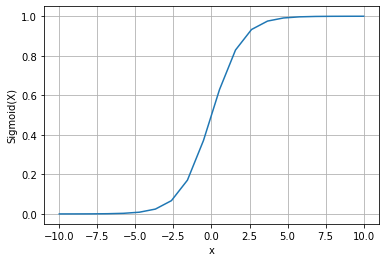

In [ ]:
x = np.linspace(-10, 10, 20) # 20 equidistant points between -10 and 10
z = sigmoid(x)

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

<img src='https://drive.google.com/uc?id=1zGdf4smFWRnR-LuAFwZyvcv8MkNG19ga'>




- plot shows: 
    - when σ() close to 0.5, the rate at which the sigmoid value increases and decreases  very fast
    - And as σ() go further away from 0.5 and towards 1 or 0, the rate at which the sigmoid value increases and decreases gets plateaued.

For example:
- if we take x1 =7.5 and x2 = 10.0
- we know $σ(z_1) < σ(z_2)$ as sigmoid monotonically increasing
- But the difference between $σ(z_2)- σ(z_1)$ would be very small 



### Log-loss

 

<img src='https://drive.google.com/uc?id=1ei8v6vmyuuSLX6OXXVzLhKOOUk_PU8rP'>



Recap:

- We have data of n samples $(x_i,y_i)_{i=1}^{i=n}$ where $x_i$ is a d feature vector with values belonging to Real number. While $y_i$ has value 0 or 1 on the basis of which the data is categorized.

- we want a linear hyperplane ($\pi d =  w^Tx+w_0$) that best separates the data out into two categories 

- We saw some huddles while performing logistic Regression to find the best hyperplane:

    - How $z_i=w^Tx_i+w_0$ can range between $(-∞,+∞)$ but $y_i$ in range (0,1) 
        - Solution: used sigmoid function $σ(z_i) = \frac{1}{1+e^{-z_i}}$



Now we have $y_i$ values as 0 or 1 but our predicted $y_î$ which ranges between 0 and 1 
## **How to compare $y_i$ vs $y_î$ to optimize the weights of the model ?**
We use Log-Loss as the loss function for Classification of data 


<img src='https://drive.google.com/uc?id=1R_C_cXOpra4Y6Xz0U0IcDrlMrM0M1_6w'>



For Log-loss function we say,
- when $y_i=1$, log loss is equal to $-log(y_i ̂ $)
- when $y_i=0$, log loss is equal to $-log(1-y_i ̂$)

if we consider only the case when $y_i=1$, log loss is equal to $-log(y_i ̂ $), the plot shows:
- how drastically the value of $-log(y_î)$ decreases as $y_î $ moves from 0 towards 1

#### But how can the drastic change in value of $-log(y_î)$ help ?  
- Notice how $-log(y_î)$ is very high when $y_i = 1$ and $y_î = 0 $ 
- And how $-log(y_î)$ is very low or equal to 0 when $y_i = 1$ and $y_î = 1 $ 
- Thus making the logistic Regression model to have weights close to $y_i = 1$ 

if we consider only the case when $y_i = 0 $, log loss is equal to $-log(1- y_i ̂ $), the plot shows:
- how drastically the value of $-log(1-y_î)$ increases as $y_î $ moves from 0 towards 1

#### What can we understand from this plot then ?
- if $y_i = 0$ and $y_î = 0 $ $-log(1-y_î)$ is very small or close to 0 
- but if $y_i = 0$ and $y_î = 1 $ $-log(1-y_î)$ is very large



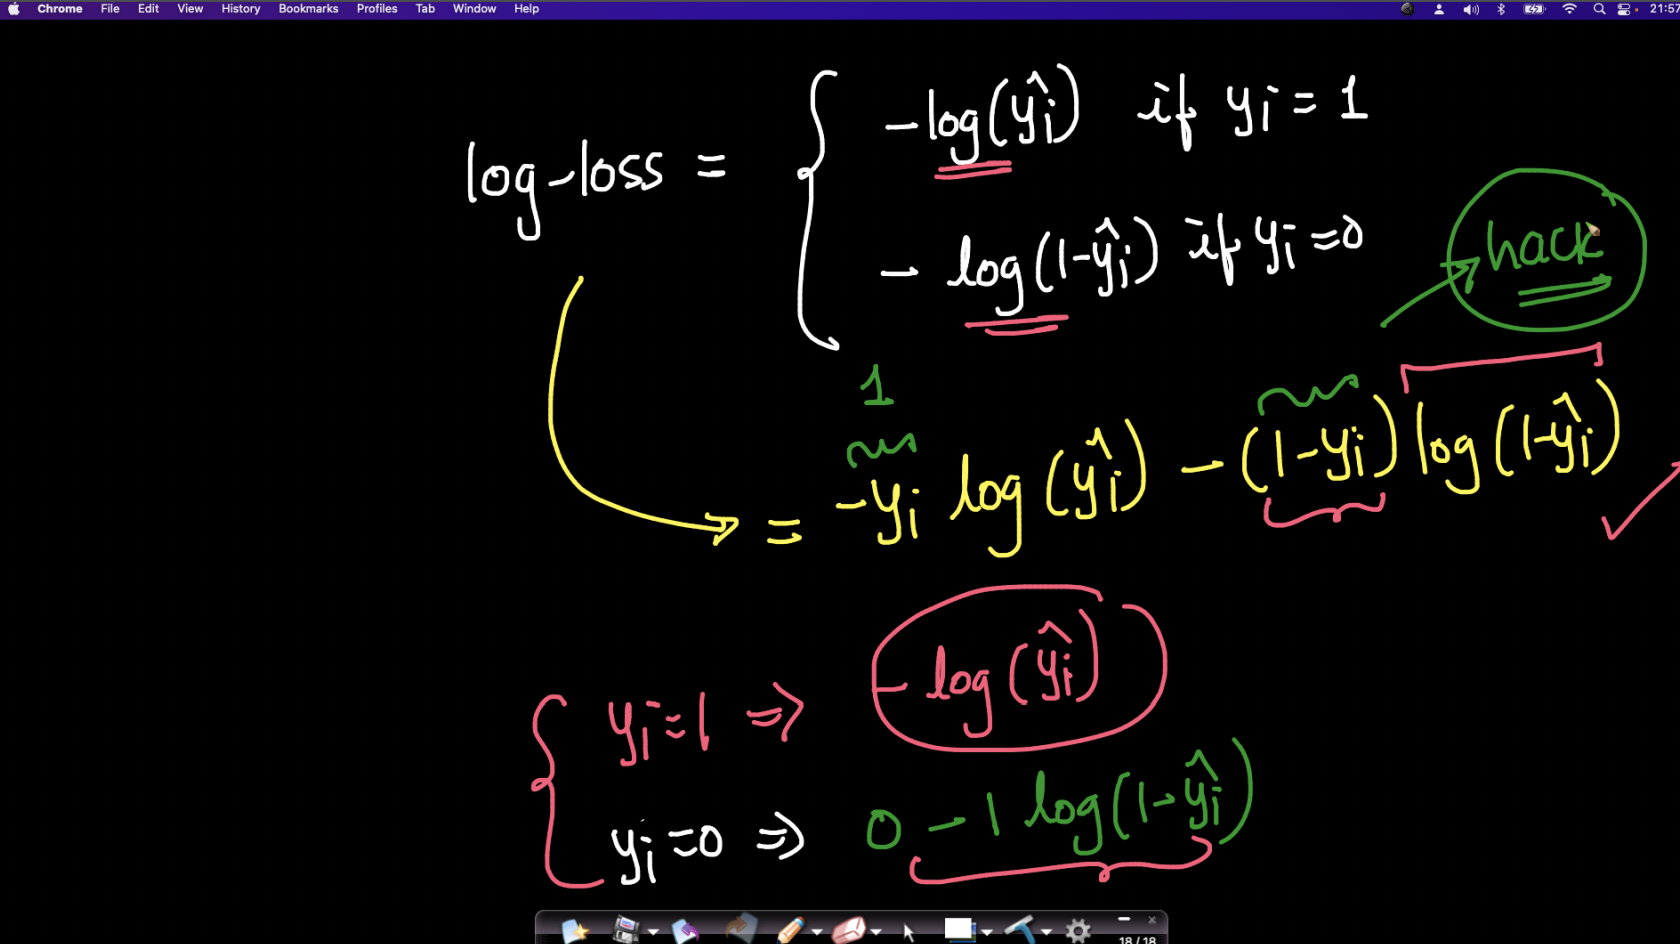

#### What hack can we use to combine both the two log-losses?

Simply add them (one of the parts will also be zero)


- log-loss $ = -y_i log(y_i ̂) - (1-y_i) log(1-y_i ̂)$
- if $y_i = 1$ ==> log-loss $= -1log(y_i ̂) - (1-1)log(1-y_i ̂) = -log(y_i ̂)$
- if $y_i = 0$ ==> log-loss $= -0log(y_i ̂) - (1-0)log(1-y_i ̂) = -log(1-y_i ̂)$    

## **Question: Why Log-loss?**

- We will derive Logistic Regression using Probability Theory by using something known as  **maximum likelihood estimation (MLE)**, naturally the function which we will get is log-loss.

- We can use any other function for calcualting the loss, but then that will be a different classifier model and not logistic regression.







#### **Question: Why does Mean squared Error (MSE) loss does not work ?** 

- Recall how for model to perform well, we want the loss function to be a convex function w.r.t the weights of the model

#### Why Convex function ?
- Recall, how convex function have one global minima and how the optimization problem reaches it 


- One of the main reasons why MSE doesn’t work with logistic regression is when the MSE loss function is plotted with respect to weights of the logistic regression model, the curve obtained is not a convex curve which makes it very difficult to find the global minimum.

  


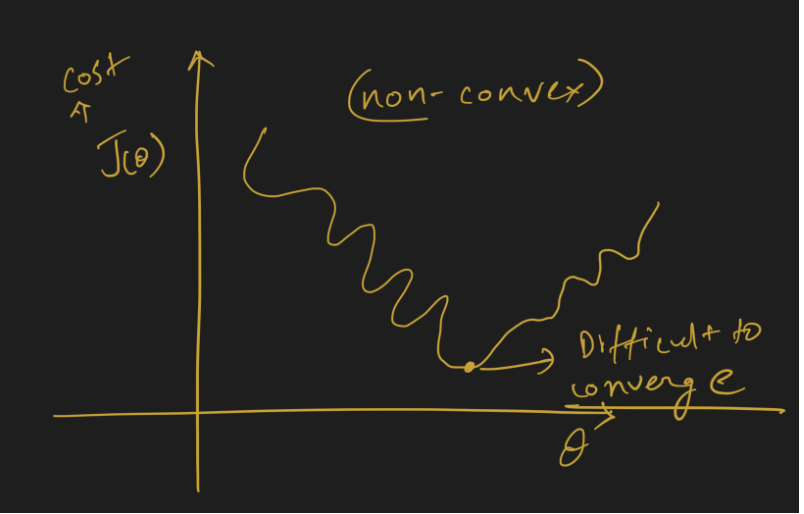

- if we used MSE, the output of sigmoid function when passed to MSE returns a non-convex function 

Problems:
- Difficult to converge.
- Gradients can get stuck at local minimum.




Now let's a take a look at how to implement log-loss function

Case1: 
- When $y_i = 1$ and $y_î = 0.9$

In [ ]:
import math 

y = 1
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- Notice how loss is almost 0.1 which is close to 0. 


Lets bring $y_î$ even closer to 1 

Case2: 
- When $y_i = 1$ and $y_î = 0.99$

In [ ]:
y = 1og(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- observe how just by incrementing $y_î$ by 0.09, there is a drastic decrease in loss

- Now lets see what happens when  $y_î$ gets closer to 0

Case3: 
- When $y_i = 1$ and $y_î = 0.1$

In [ ]:
y=1
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.3025850929940455


- Notice much high the log-loss is

Lets bring $y_î$ even closer to 0

Case4: 
- When $y_i = 1$ and $y_î = 0.01$

In [ ]:
y=1
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

4.605170185988091


- observe how just by a small variation in $y_î$, there is a drastic increase in loss


Now lets see what happens for the scenario when :  

Case5: 
- When $y_i = 0 $ and $y_î = 0.1$


In [ ]:
y=0
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- notice how there is a small loss for it which is identical to case 1

- now lets bring $y_î$ closer to 0

Case6:
- When $y_i = 0 $ and $y_î = 0.01$

In [ ]:
y=0
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- notice how loss decreased similar to case 2 


Case6:
- When $y_i = 0 $ and $y_î = 0.9$

In [ ]:
y=0
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.302585092994046


2.302585092994046

- As expected now, the loss will be high 

To summarize:
- The value of **log-loss is decreases** as our $y_î$ is geting closer to $y_i$

- and **log loss is increasing** as our $y_î$ is geting farther from $y_i$

this means that, 
- we can use Optimization techniques, like gradient descent, to  log-loss function to get the optimal weights of the logistic regression model

# Optimization


- We only have seen, log-loss for ith sample of the data.

- We define our loss function for logistic regression as  summation of log-loss$_i$ for all the n samples of the data.
    - $L = ∑_{i=1}^{i=n} [-y log(y_î) - (1-y)log(1-y_î)] $


## **Regularisation**


<img src='https://drive.google.com/uc?id=1ps7CIjHM1E-4W5RKpARI7rSQu8bE-A91'>



####What is the main thing we need to check for optimization ?

The loss function should be differentiable.

Lets break the loss term in to parts to check for differentiability

1. Check if log is differentiable
    - We saw in the pre-read
    - $\frac{d log(x)}{dx} = \frac{1}{x}$
2. Check if $\hat{y_i} = σ(w^Tx_i+w_0)$ is differentiable
    -  From Linear Regression lecture, we know that $w^Tx_i+w_0$ is differentiable
    - Now we need to check for sigmoid function,  $σ = \frac{1}{1+e^{-z} }$
    - Turns out that the sigmoid functuon is a differentable function : $σ'(z) = σ(z)(1-σ(z))$
    - If you are interested, you can check the prove for this in today's post-read 

Hence we can use Gradient Descent for our loss function.







Before deriving this, lets revise a couple of done in Pre-Read

#### Simple Derivation rules


1. **Power Derivative**

 $$\frac{d x^{n}}{dx} = n.x^{n-1}$$

 Similarly

  $$\frac{d x^{-n}}{dx} = -n.x^{-(n+1)}$$

2. **Log Derivative**

$$\frac{d log(x)}{dx} = \frac{1}{x}$$


3. **Exponential Derivative**

 $$\frac{d e^{ax}}{dx} = a.e^{ax}$$

 Similarly, 

 $$\frac{d e^{-ax}}{dx} = -a.e^{-ax}$$



---



#### Lets come back the derivative for sigmoid
 
$$σ = \frac{1}{1+e^{-z} }$$

 Lets write the same as a power

$$σ=(1+e^{-z})^{-1}$$

Lets substitute $(1+e^{-z})$ this with $u$, thus

$$σ=(u)^{-1}$$

And lets use power rule here and take the derivative of sigmoid equation in terms $u$ w.r.t to $z$

 $$\frac{d u^{-1}}{dz} = -u^{-2} . \frac{du}{dz}$$


 Lets work seperately on calulcating $\frac{du}{dx}$


$$\frac{du}{dz} = \frac{d (1+e^{-z})}{dz}$$

Lets do the same thing, lets take the derivative of above equation in terms $z$ w.r.t to $x$ first, and then multiply $\frac{dz}{dx}$


$$\frac{du}{dz} = \frac{d(1)}{dz} + \frac{d (e^{-z})}{dz}$$

First term, becomes zero.


We already know that derivative of negative exponent $\frac{d e^{-ax}}{dx} = -a.e^{-ax}$


$$\frac{du}{dz} = -e^{-z}$$

Now subsituting the value of $\frac{du}{dz}$ to equation $σ'(z) = \frac{d u^{-1}}{dz} = -u^{-2} . \frac{du}{dz}$

$$ σ'(z) = -u^{-2} . -e^{-z} $$

Replacing $u$ with $1+e^{-z} $ 


$$σ'(z) = \frac{1.e^{-z}}{(1+e^{-z})^{2}} $$

Now rewriting the equation a bit 

$$σ'(z) = \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} $$

And since 1-1 = 0 , we can do a little tweek in the equation

$$σ'(z) = \frac{1}{1+e^{-z}} \frac{e^{-z}+1-1}{1+e^{-z}} $$

Rewriting equation a bit 

$$σ'(z) = \frac{1}{1+e^{-z}} [ \frac{e^{-z}+1}{1+e^{-z}}-\frac{1}{1+e^{-z}}] $$

Equation becomes:

$$σ'(z) = \frac{1}{1+e^{-z}} [ 1 -\frac{1}{1+e^{-z}}] $$

As we know $σ(z) = \frac{1}{1+e^{-z}}$, Equation becomes:

$$σ'(z) = σ(z) [ 1 -σ(z)] $$


Now that we know the log-loss is differentiable, lets find the gradient of the log-loss






Now our log-loss is defined as:
- $$Logloss (L) = min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î) $$

- What all we know 
    - $$\frac{d log(x)}{dx} = \frac{1}{x}$$
    - $$ σ'(z) = σ(z)(1-σ(z)) $$
    - $$ \frac{\partial (w^Tx_i+w_0)}{\partial w_j} = x_i $$

Also recall chain rule
- if $u = \sigma(z)$ , where $z = 3x $,then 
$$\frac{du}{dx} = \frac{du}{dz} * \frac{dz}{dx} $$

-  Therefore $\frac{du}{dz} = \frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))$
- And $ \frac{dz}{dx} = \frac{d(3x)}{dx} = 3 $
- hence final equation becomes:  
- $$\frac{du}{dx} = \sigma(z)(1-\sigma(z))  * 3 $$

--- 

With the same concept:

$$\frac{\partial L}{\partial w_j} = \frac{\partial L}{\partial y_i ̂} * \frac{\partial y_i ̂}{\partial z_i} * \frac{\partial z_i}{\partial w_j} $$

Now lets take $\frac{\partial L}{\partial y_i ̂}$:
- $$ \frac{\partial L}{\partial w_j} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}* (-1)* [\frac{\partial(1- y_i ̂)}{\partial z_i} ] $$

On solving $ [\frac{\partial(1- y_i ̂)}{\partial z_i} ] $
- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}* (-1)* [\frac{\partial (1)}{\partial z_i}- \frac{\partial y_i ̂}{\partial z_i} ] $$

which can be simplified since, $\frac{d(constant)}{dx} = 0 $

- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} - (1-y)\frac{1}{1-y_i ̂}*(-1)*\frac{\partial y_i ̂}{\partial z_i} $$

- $$ \frac{\partial L}{\partial y_i ̂} = y\frac{1}{y_i ̂}* \frac{\partial y_i ̂}{\partial z_i} + (1-y)\frac{1}{1-y_i ̂}*\frac{\partial y_i ̂}{\partial z_i} $$
Now we know  $ y_i ̂ =  σ(z) $, 

and $$\frac{σ(z)}{dz} =  σ(z)(1-σ(z)) = y_i ̂ (1- y_i ̂)$$

- Therefore $$ \frac{\partial y_i ̂}{\partial z_i} = y_i ̂(1-y_i ̂) $$


Subsituting it to our equation, 


- $$ \frac{\partial L}{\partial w_j} = y\frac{1}{y_i ̂}* y_i ̂(1-y_i ̂) \frac{\partial z_i }{\partial w_j} + (1-y)\frac{1}{1-y_i ̂}*y_i ̂(1-y_i ̂) \frac{\partial z_i}{\partial w_j}$$


On simplifying since we can cut some terms in the numerator and denominator

-  $$ \frac{\partial L}{\partial w_j} = -y(1-y_i ̂) \frac{\partial z_i }{\partial w_j} + (1-y)*y_i ̂ \frac{\partial z_i}{\partial w_j}$$

Now on opening the round brackets we get,
- $$ \frac{\partial L}{\partial w_j} = -y\frac{\partial z_i }{\partial w_j} + y*y_i ̂ \frac{\partial z_i }{\partial w_j} + y_i ̂ \frac{\partial z_i}{\partial w_j} - y*y_i ̂ \frac{\partial z_i}{\partial w_j}$$

Now on further solving, we get 
- $$ \frac{\partial L}{\partial w_ĵ} = -y\frac{\partial z_i }{\partial w_j} + y_i ̂ \frac{\partial z_i}{\partial w_j}$$
- $$ \frac{\partial L}{\partial w_j} = (y_i ̂-y) \frac{\partial z_i}{\partial w_j}$$

Since $z_i = w^Tx_i+w0$, $\frac{\partial z_i}{\partial w_j} = x_{ij}$

Therefore equation becomes:
- $$ \frac{\partial L}{\partial w_ĵ} = \frac{1}{n}∑_{i=1}^{i=n}(y_i ̂-y) x_{ij}$$

Question: if there is no non-linear feature, should we use Regularization when performing $min_{w_j}L$ ?
Ans: yes, to avoid overfitting of the model.

- hence we add an L-2 Regularization term to the loss function L 

Now, gradient descent has to perform gradients on the equation: 
- $min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î)+λ∑_jw_j^2]$


Now, we have to regularise the same 
* For which we will use the regularization term which is $λ∑_jw_j^2$
* This is same as Linear Regression 

Now, the optimization function becomes 
* $min_{w_j}∑_{i=1}^n[-y log(y_î) - (1-y)log(1-y_î)+λ∑_jw_j^2]$

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Hypothesis function and sigmoid 

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


def hypothesis(X, weight):
    """
    X - np array (m,n)
   weight - np arrary (n, 1)
    """
    return sigmoid(np.dot(X, weight))


Cost function

In [ ]:
def error(X, y, weight):
    """
    params:
        X - np array (m,n)
        y - np array (m,1)
        weight - np arrary (n,1)
    
    return :
        scalar value = loss value
    """
    model = hypothesis(X, weight)
    err = np.mean((y*np.log(model) + (1-y)*np.log(1 - model)))
    
    return -err



Optimisation using Gradient descent

In [ ]:
def gradient(X, y, weight):
    """
    X - (m,n)
    y - (m,1)
    weight - (n,1)
    
    return - (n, 1)
    """
    model = hypothesis(X, weight)
    grad = (np.dot(X.T, (model - y)))
    return grad/X.shape[0]



def gradient_descent(X, y, lr = 0.5, max_iter = 30):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    
    for _ in range(max_iter):
        e = error(X, y, weight)
        error_list.append(e)
        
        grad = gradient(X, y, weight)
        
        #Update Rule
        weight = weight - lr*grad
    
    return (weight, error_list)
    


Creating some data for simplicity 
- Since real world problems are more tricky and lots of EDA are required 

In [ ]:
##dataset creation
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
#converting row vector to column vector
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(500, 2) (500, 1)


Weights of the model 

In [ ]:
weight = np.zeros((X.shape[1], 1))
weight

array([[0.],
       [0.]])

Plotting the data 

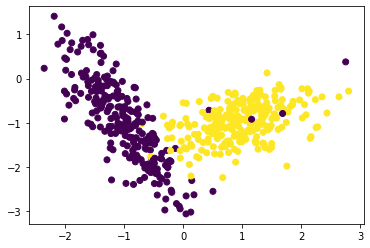

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Adding bias term

In [ ]:
ones= np.ones((500,1))
X_ = np.hstack((ones, X))
X_[:5]
X_.shape

(500, 3)

Splitting the data into train and test
- To test the model on unseen data

In [ ]:
from sklearn.model_selection import train_test_split


# reserving 20% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)


Train the model

In [ ]:
opt_weight, error_list = gradient_descent(X_train, y_train)

Checking the learned parameters and loss

In [ ]:
##learned parameters
opt_weight

array([[0.11877655],
       [2.30509204],
       [0.11405031]])

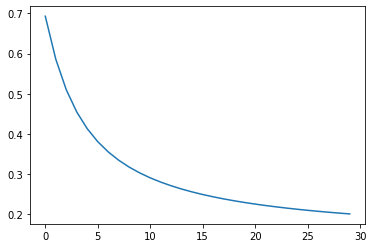

In [ ]:
plt.plot(error_list)

Plotting the Hyperplane that best separates the original data

In [ ]:
##generating points to plot the learned line
x1 = np.array([-1, 1])
x2 = - (opt_weight[0] + opt_weight[1]*x1) / opt_weight[2]
print(x2)

[ 19.16974639 -21.25262639]


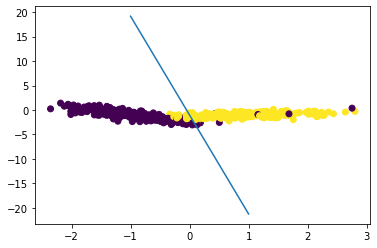

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(x1, x2)
plt.show()




### Big Picture 

 Let's see all the steps together
 0. The data we have here, n samples with $x_i$ and $y_i$ such that $y_i$ have value either 0 or 1

 1. For classification of data, we need a  linear seperator hyperplane i.e $w^Tx_i+w_0$

 2. Since $z_i = w^Tx_i+w_0$ ranges from $(-∞,∞)$, we squashed the $z_i$ values between 0 and 1 using sigmoid function. 
    - These values between 0 and 1,  can also be seen as a probability of $y_i=1$ given $x_i$

 3. After that we want to compare $y_i$ and $y_î$ and why log-loss works 
 4. Then we defined how our cost function looks and why regularisation is needed 
 5. As covered in Linear Regression, hyper parameter tuning for over-fitting and under-fitting trade off, in order to find the best model. 
    - The hyper parameter here is $λ$ or regularization parameter.
 

<img src='https://drive.google.com/uc?id=1V59eCP7m-y21_gZ8QY4xsBMvGG8LHXff'>



<img src='https://drive.google.com/uc?id=1J51riAC25oXNe7GHId0_0nGyD1BWB-Ms'>
